# Visual Python: simplifier l'analyse des données pour les apprenants Python

Visual Python apparaît comme un générateur de code Python intuitif basé sur une interface graphique, parfaitement intégré à Jupyter Lab, Jupyter Notebook et Google Colab. De plus, les utilisateurs peuvent opter pour le Visual Python Desktop autonome. Ce projet open source a été lancé pour aider les étudiants à naviguer dans les cours Python pour la science des données, en offrant une approche rationalisée du codage.

![](visual-python.png)
![](visual-python-2.png)

## Avantages clés:

- **Gestion des données avec un codage minimal:** Visual Python facilite la gestion de grands ensembles de données avec un minimum de compétences en codage, ce qui en fait un outil idéal pour les débutants.
- **Surmonter les barrières d'apprentissage:** Conçu pour les étudiants, les analystes commerciaux et les chercheurs, Visual Python aide à surmonter les barrières d'apprentissage associées à la programmation Python.
- **Gestion des extraits de code:** Enregistrez et réutilisez sans effort les extraits de code fréquemment utilisés.

## Installation:

Pour exploiter la puissance de Visual Python, installez les packages requis à l'aide de la commande suivante:

In [1]:
%%capture
! pip install -U jupyterlab-visualpython plotly wordcloud

## Exemple avec l'ensemble de données Pokémon:

Explorons les capacités de Visual Python à l'aide de l'ensemble de données Pokémon. Cet exemple montre comment Visual Python génère du code pour un nuage de mots, fournissant une représentation visuelle sans avoir besoin de mémoriser la syntaxe complexe de matplotlib.

Matplotlib is building the font cache; this may take a moment.


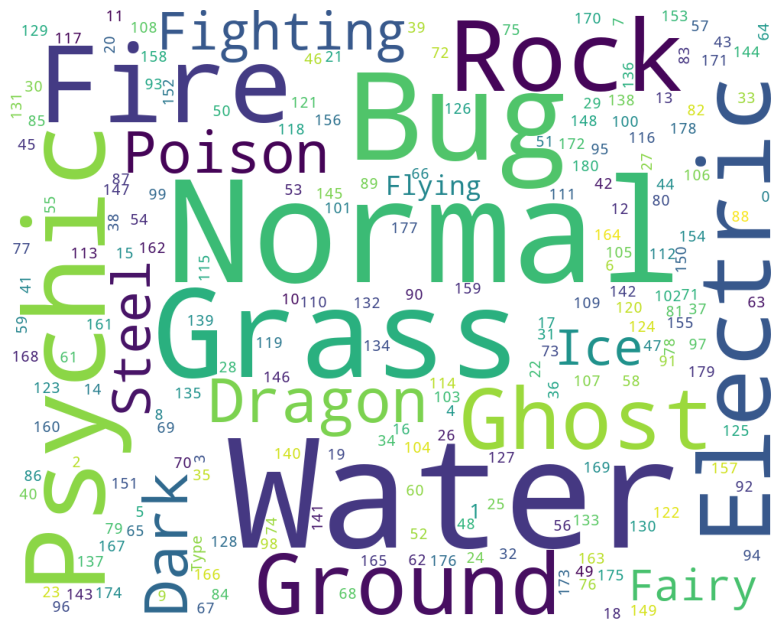

In [2]:
import pandas as pd
from ydata_profiling.utils.cache import cache_file
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

file_name = cache_file(
    "pokemon.csv",
    "https://raw.githubusercontent.com/bryanpaget/html/main/pokemon.csv"
)

pokemon_df = pd.read_csv(file_name)
counts = Counter(pokemon_df[["Type 1"]].to_string().split())
tags = counts.most_common(200)

wc = WordCloud(max_font_size=200, background_color='white', width=1000, height=800)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(8, 20))
plt.imshow(cloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

## Statistiques descriptives et visualisation:

Visual Python étend ses capacités aux statistiques descriptives et à la visualisation de données. L'extrait de code ci-dessous montre comment Visual Python simplifie le processus, en générant des graphiques et des statistiques avec un minimum d'effort.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import pyarrow as pa

init_notebook_mode(connected=True)
%matplotlib inline

vp_df = pokemon_df[['HP', 'Attack', 'Defense', 'Speed']].copy()
vp_df.head()

ModuleNotFoundError: No module named 'pyarrow'

## Statistiques descriptives

In [ ]:
from IPython.display import display, Markdown
display(pd.DataFrame({
    'N Total':vp_df.shape[0],
    'N Valid':vp_df.count(numeric_only=True),
    'N Missing':vp_df.loc[:,vp_df.apply(pd.api.types.is_numeric_dtype)].isnull().sum(),
    'Mean':vp_df.mean(numeric_only=True),
    'Median':vp_df.median(numeric_only=True),
    'Mode':vp_df.mode(numeric_only=True).iloc[0],
    'Sum':vp_df.sum(numeric_only=True),
    'Minimun':vp_df.min(numeric_only=True),
    'Maximum':vp_df.max(numeric_only=True),
    'Range':vp_df.max(numeric_only=True) - vp_df.min(numeric_only=True),
    'Std. deviation':vp_df.std(numeric_only=True),
    'S.E. mean':vp_df.std(numeric_only=True)/np.sqrt(vp_df.count(numeric_only=True)),
    'Skewness':vp_df.skew(numeric_only=True),
    'Kurtosis':vp_df.kurtosis(numeric_only=True),
    'Percentile: 25':vp_df.quantile(q=0.25, numeric_only=True),
    'Percentile: 50':vp_df.quantile(q=0.50, numeric_only=True),
    'Percentile: 75':vp_df.quantile(q=0.75, numeric_only=True),
}).round(3).T)

## Tableau des fréquences

In [ ]:
for col in vp_df.columns:
    if pd.api.types.is_numeric_dtype(vp_df[col]) and  vp_df[col].value_counts().size > 10:
        _bins = 10
    else: _bins = None
        
    _dfr = pd.DataFrame({
              'Frequency':vp_df[col].value_counts(bins=_bins, sort=False),
              'Percent':100*(vp_df[col].value_counts(bins=_bins, sort=False) / vp_df[col].size),
              'Valid percent':100*(vp_df[col].value_counts(bins=_bins, sort=False)/vp_df[col].count())
}).round(2)
    _dfr['Cumulative percent'] = _dfr['Valid percent'].cumsum()
    _dfr.loc['N Valid',:] =  _dfr.iloc[:,:3].sum()
    _dfr.loc['N Missing','Frequency'] =  vp_df[col].isnull().sum()
    _dfr.loc['N Total','Frequency'] =  vp_df[col].size
    display(Markdown(f"### {col}"))
    display(_dfr)

## Graphiques

In [ ]:
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    display(Markdown("### Histogramme"))
    idx = 1
    for col in vp_df.columns:
        plt.subplot(2,2, idx)
        if pd.api.types.is_numeric_dtype(vp_df[col]) and  vp_df[col].value_counts().size > 10:
            sns.histplot(data=vp_df, x=col, kde=True)
        else:
            sns.countplot(data=vp_df, x=col)
        
        if idx < 4:
            idx += 1
        else:
            idx = 1
            plt.tight_layout()
            plt.show()
        
    display(Markdown("### Matrice de dispersion"))
    pd.plotting.scatter_matrix(vp_df, marker='o', hist_kwds={'bins': 30}, s=30, alpha=.8)
    plt.show()

    display(Markdown("### Boîte à moustaches"))
    sns.boxplot(vp_df)
    plt.show()

## Visualisation Seaborn avec Visual Python:

Visual Python simplifie la création de cartes Seaborn. Pas besoin de fouiller dans la documentation; Visual Python fonctionne comme un système de modèles, générant du code pouvant être facilement modifié.

In [ ]:
sns.scatterplot(data=pokemon_df, x='HP', y='Defense', hue='Attack', color='#d6d6d6')
plt.legend(loc='upper right')
plt.title('Pokemon')
plt.xlabel('HP')
plt.ylabel('Defense')
plt.show()

Renforcez votre parcours d'apprentissage Python avec Visual Python, en réduisant les obstacles à l'analyse et à la visualisation des données, en particulier pour ceux qui sont habitués à Excel, Power BI et SAS dans le domaine des organisations statistiques nationales du gouvernement.